In [46]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configure your database connection
db_host = 'localhost'
db_port = '5432'
db_name = 'tickvah_banks_ads'
db_user = 'postgres'
db_password = 'ocho'

# Create the database URL
db_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create the SQLAlchemy engine
engine = create_engine(db_url)

# Load the CSV file into a DataFrame
tele_filepath = '../data/daily_telegram_subscriptions.csv'
telegram_df = pd.read_csv(tele_filepath)

# Write the DataFrame to a new table in the PostgreSQL database
telegram_df.to_sql('telegram_data', engine, if_exists='replace', index=False)

print("Data saved successfully.")


Data saved successfully.


Time series Telegram channel subscription growth


In [13]:

# Function to load data from the database
def load_data(engine):
   telegram_df= pd.read_sql('SELECT * FROM telegram_data', engine)
   return telegram_df

In [66]:

telegram_data_from_db =load_data(engine)
telegram_data_from_db.head()

,date,subscribers
0,2017-01-01,161595
1,2017-01-02,161595
2,2017-01-03,161595
3,2017-01-04,161595
4,2017-01-05,161596


In [18]:
telegram_data_from_db.describe()

,subscribers
count,2705.000000
mean,161601.662477
std,2.717250
min,161595.000000
25%,161600.000000
50%,161602.000000
75%,161603.000000
max,161611.000000


In [19]:
# Assessing Missing Values
missing_values = telegram_data_from_db.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
date           0
subscribers    0
dtype: int64


time based analysis

In [38]:
telegram_data_from_db['date'] = pd.to_datetime(telegram_data_from_db['date'], format="%Y-%m-%d")
telegram_data_from_db['Month'] =  telegram_data_from_db['date'].dt.month
telegram_data_from_db['Year'] =  telegram_data_from_db['date'].dt.year
print( telegram_data_from_db.head())


        date  subscribers  Month  Year
0 2017-01-01       161595      1  2017
1 2017-01-02       161595      1  2017
2 2017-01-03       161595      1  2017
3 2017-01-04       161595      1  2017
4 2017-01-05       161596      1  2017


In [20]:
# Checking Data Consistency
date_consistency = telegram_data_from_db['date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).notnull().all()
print("Date Consistency:", date_consistency)

Date Consistency: True


In [39]:
# Checking Data Duplicates
duplicates =  telegram_data_from_db.duplicated().sum()
print("Duplicate Records:", duplicates)

Duplicate Records: 3


In [40]:

# Remove duplicates
df_no_duplicates = telegram_data_from_db.drop_duplicates()

print(df_no_duplicates)


           date  subscribers  Month  Year
0    2017-01-01       161595      1  2017
1    2017-01-02       161595      1  2017
2    2017-01-03       161595      1  2017
3    2017-01-04       161595      1  2017
4    2017-01-05       161596      1  2017
...         ...          ...    ...   ...
2697 2024-05-21       161605      5  2024
2698 2024-05-22       161605      5  2024
2699 2024-05-23       161605      5  2024
2700 2024-05-23       161606      5  2024
2704 2024-05-23       161611      5  2024

[2702 rows x 4 columns]


In [49]:
# Group data by year and calculate the total subscribers
def subscriber_year(telegram_data_from_db):
  yearly_views =  telegram_data_from_db.groupby('Year')['subscribers'].sum()

# Create a line chart
  plt.plot(yearly_views.index, yearly_views.values, marker='o')
  plt.xlabel('Year')
  plt.ylabel('Total subscribers')
  plt.title('Total subscribers by Year')
  plt.grid(True)
  plt.show()

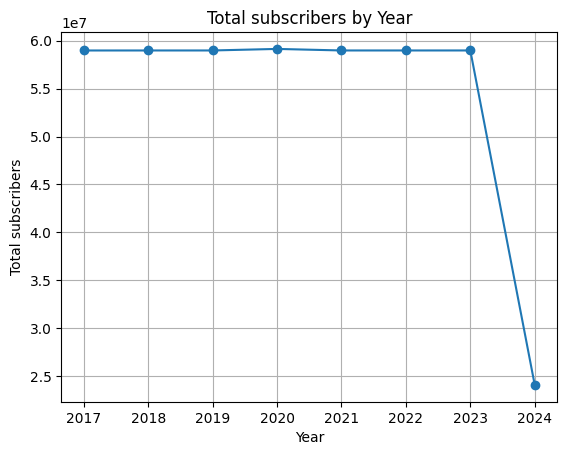

In [50]:
subscriber_year(telegram_data_from_db)

In [47]:
# Function for univariate analysis
def univariate_analysis(telegram_data_from_db):
    plt.figure(figsize=(10, 6))
    sns.histplot(telegram_data_from_db['subscribers'], bins=30, kde=True)
    plt.title('Distribution of subscribers Counts')
    plt.xlabel('subscribers Count')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=telegram_data_from_db, x='subscribers')
    plt.title('Box Plot of subscribers Counts')
    plt.xlabel('subscribers Count')
    plt.show()

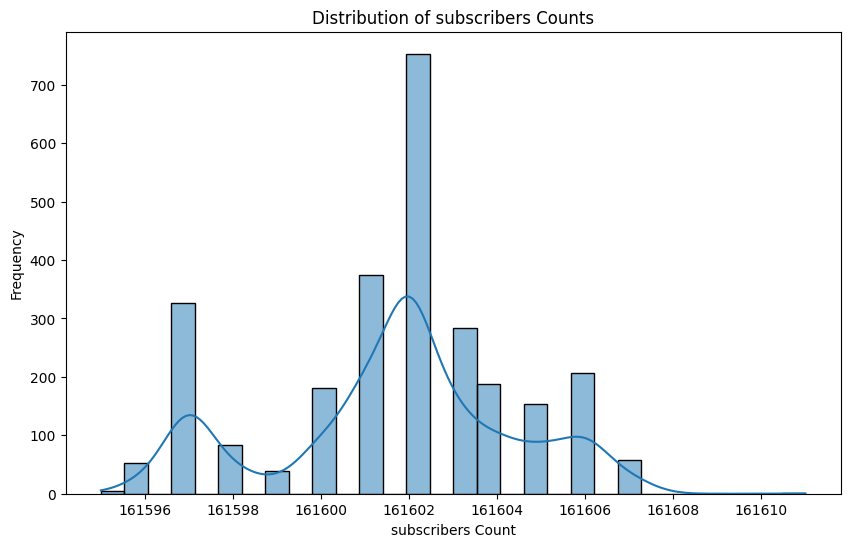

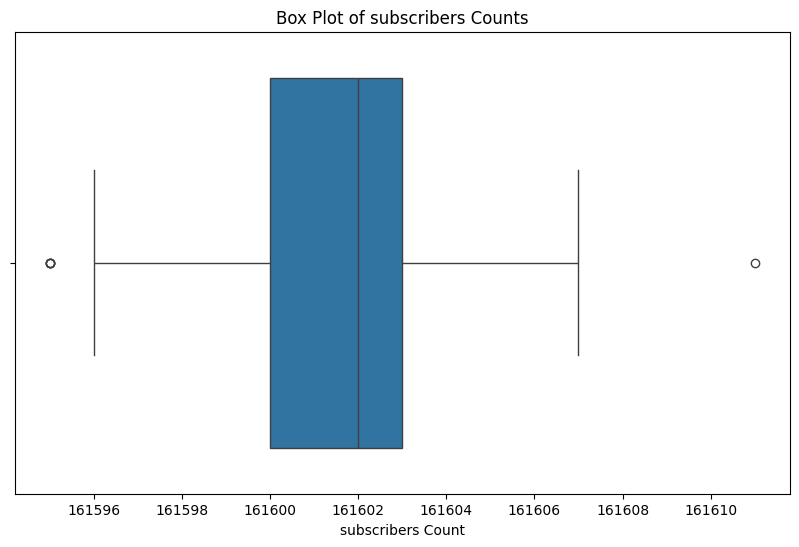

In [48]:
univariate_analysis(telegram_data_from_db)

Bivariate Analysis

In [53]:

# Date vs. View
def Bivariate_Analysis(telegram_data_from_db):
 date_vs_view = telegram_data_from_db[['date', 'subscribers']]
 date_vs_view.plot(x='date', y='subscribers', kind='line')

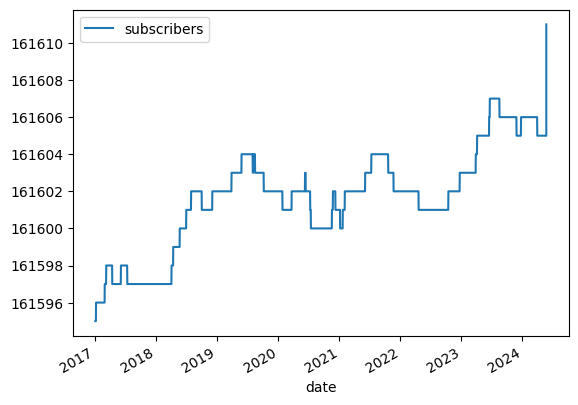

In [54]:
Bivariate_Analysis(telegram_data_from_db)

In [56]:
# Calculate total subscribers per date
def total_subscriber(telegram_data_from_db):
 views_per_date = telegram_data_from_db.groupby('date')['subscribers'].sum()

# Plot trends over time
 plt.figure(figsize=(12, 6))
 plt.plot(views_per_date.index, views_per_date.values, marker='o')
 plt.xlabel('Date')
 plt.ylabel('Total subscribers')
 plt.title('Trends Over Time')
 plt.xticks(rotation=45)
 plt.grid(True)
 plt.show()

 date_vs_view = telegram_data_from_db[['date', 'subscribers']]

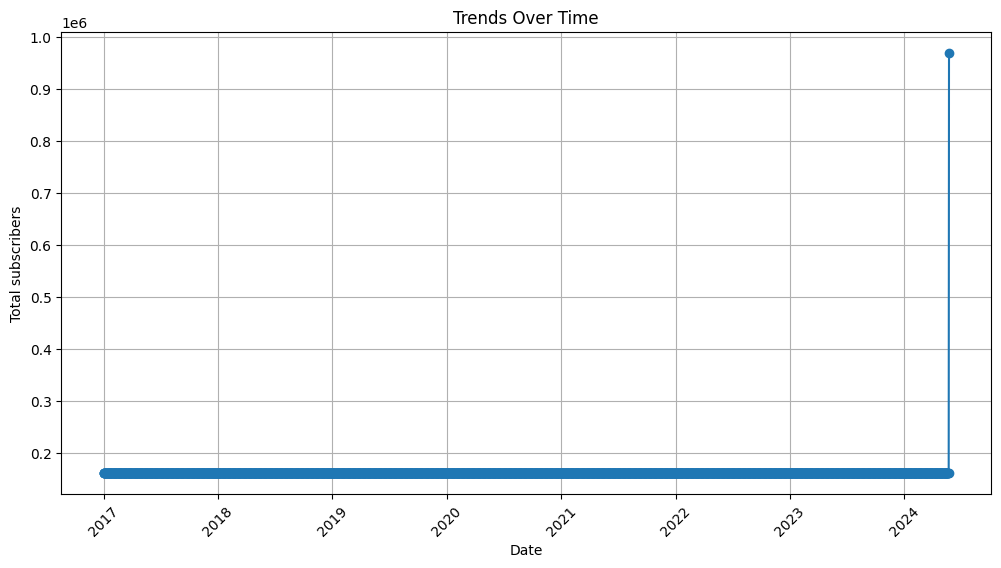

In [57]:
total_subscriber(telegram_data_from_db)

In [62]:
#  Visualization
def Visualization(telegram_data_from_db):
 telegram_data_from_db['Year'].value_counts().plot(kind='bar')
 plt.title('subscribers Over Time')
 plt.xlabel('date')
 plt.ylabel('subscribers')
 plt.show()

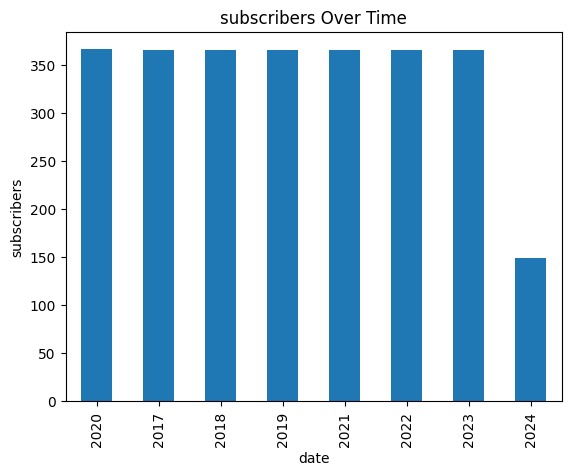

In [63]:
Visualization(telegram_data_from_db)